# Familiar (Blood Transfusion Company)
Welcome to Familiar, a startup in the new market of `blood transfusion!`

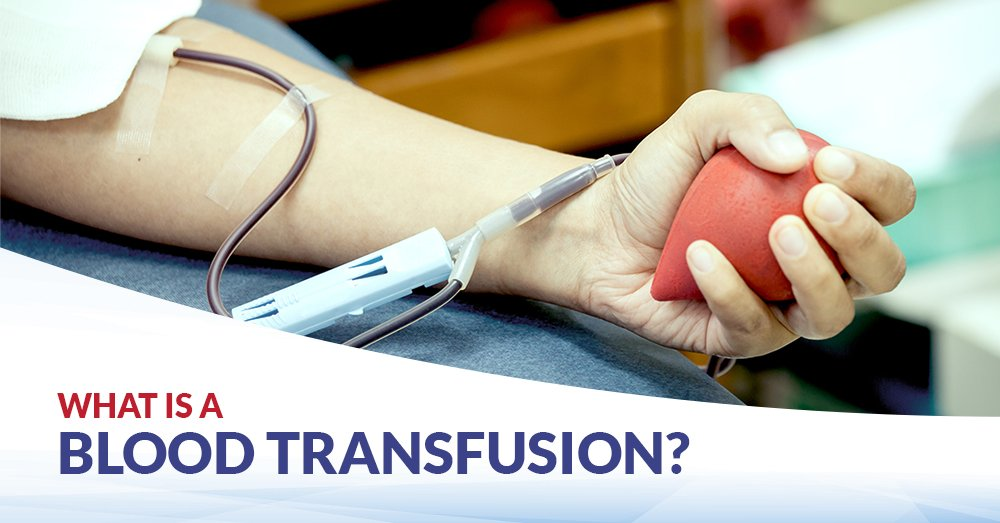

Blood transfusion is the process of transferring blood products into a person's circulation intravenously. Transfusions are used for various medical conditions to replace lost components of the blood.

Part I. 

`Familiar's best package`
- The first thing we want to know is whether Familiar’s most basic package, the Vein Pack, actually has a significant impact on the subscribers. It would be a marketing goldmine if we can show that subscribers to the Vein Pack live longer than other people.

Part II 

`Life span`
- Compare the lifespan data between different packages (Vien and Artery).

Part III 

`Side Effect`
- Analyze the side effect of different packages (Vien and Artery)

### Loading Data

In [253]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
lifespans = pd.read_csv('familiar_lifespan.csv')
iron = pd.read_csv('familiar_iron.csv')

### Data Inspection

In [257]:
lifespans.head(3)

,pack,lifespan
0,vein,76.255090
1,artery,76.404504
2,artery,75.952442


In [258]:
lifespans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pack      40 non-null     object 
 1   lifespan  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


<AxesSubplot:xlabel='pack', ylabel='lifespan'>

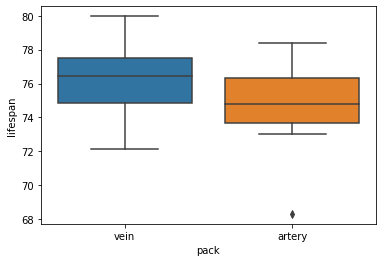

In [259]:
# checking outliers
sns.boxplot(x='pack', y='lifespan', data=lifespans)

In [260]:
# Check the value_counts for the outliers
# We have only one observation with 68 lifespan under artery, I will replace this with the artery mean value.
lifespans.value_counts().sort_values(ascending=False).head(3)

pack    lifespan 
artery  68.314898    1
vein    73.343702    1
artery  73.079249    1
dtype: int64

In [261]:
# Calculating group means
lifespans.groupby('pack').mean()

,lifespan
pack,
artery,74.873662
vein,76.169013


In [265]:
# replacing artery values that are lower than 69 with artery mean
lifespans['lifespan'] = lifespans['lifespan'].where(lifespans['lifespan'] > 69.0, 74.873662 ) 

<AxesSubplot:xlabel='pack', ylabel='lifespan'>

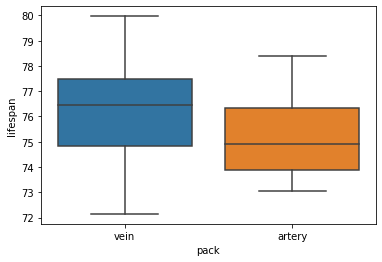

In [264]:
# Checking our NEW dataframe
sns.boxplot(x='pack', y='lifespan', data=lifespans)

# I. Familiar's best package

We’d like to find out if the average lifespan of Familiar's best seller 'Vien Package' is significantly different from the average life expectancy of 73 years.


### Hypothesis Testing (One sample T-test) 
Comparing a <font color='red'> sample average </font> to a hypothetical population average

- `Null:` The average lifespan of a Vein Pack subscriber is 73 years.
- `Alternative:` The average lifespan of a Vein Pack subscriber is NOT 73 years.

In [276]:
# separate vien and artery (must be panda series)
vein_pack_lifespans   = lifespans.lifespan[lifespans['pack'] == 'vein']
artery_pack_lifespans = lifespans.lifespan[lifespans['pack'] == 'artery']

In [277]:
# tstat, pval = ttest_1samp(np.array(vein_pack_lifespans.lifespan), 73  )
tstat, pval = ttest_1samp(vein_pack_lifespans, 73  )
print('Pvalue: ' + str('{:.10f}'.format(pval)))

Pvalue: 0.0000005972


<Figure size 1080x936 with 0 Axes>

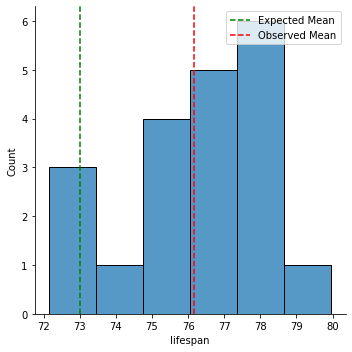

In [280]:
plt.figure(figsize=(15,13))
sns.displot(vein_pack_lifespans, kde= False)
# plt.hist(np.array(vein_pack_lifespans.lifespan))
plt.axvline(73, color = 'g', label='Expected Mean', linestyle ='--')
plt.axvline(vein_pack_lifespans.mean(), color = 'r', label='Observed Mean',linestyle ='--')
plt.legend(loc=0)
plt.show()

### Conclusion:
Reject the null hypothesis. 
Subribers who take the Vien package has longer lifespan.

# II. Life span
Pumping Life Into The Company

We’d like to find out if the average lifespan of a Vein Pack subscriber is significantly different from the average life expectancy for the Artery Pack.

In order to differentiate Familiar’s different product lines, we’d like to compare this lifespan data between our different packages. Our next step up from the Vein Pack is the Artery Pack.

# Hypothesis Testing
## Two sample T-test 
For an association between a <font color='red'>Binary(two) Categorical Variable</font> and a <font color='red'>Quantitative Variable</font>.


- `Null:` The average lifespan of a Vein Pack subscriber is equal to the average lifespan of an Artery Pack subscriber.
- `Alternative:` The average lifespan of a Vein Pack subscriber is NOT equal to the average lifespan of an Artery Pack subscriber.

In [282]:
# Check if STD is equal
# a ratio between 0.9 and 1.1 should suffice
# result is considerable
ratio = np.std(vein_pack_lifespans) / np.std(artery_pack_lifespans)
ratio

1.219307208898719

In [284]:
tstat, pval =ttest_ind(vein_pack_lifespans, artery_pack_lifespans)
print('P-value: ' + str(pval))

P-value: 0.0916441720555913


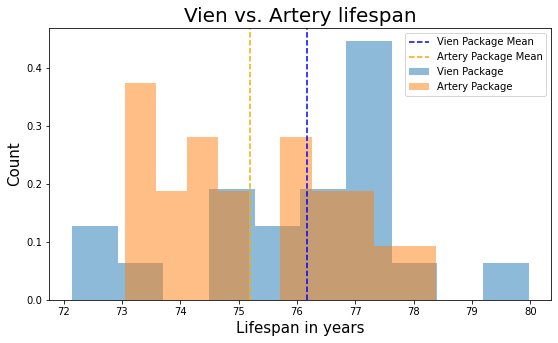

In [289]:
plt.figure(figsize=(9,5))
plt.hist(vein_pack_lifespans,   alpha=.5, label='Vien Package', density=True)
plt.hist(artery_pack_lifespans, alpha=.5, label='Artery Package',density=True)

plt.title('Vien vs. Artery lifespan', fontsize=20)
plt.xlabel('Lifespan in years', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.axvline(np.mean(vein_pack_lifespans), color = 'b', label='Vien Package Mean', linestyle ='--')
plt.axvline(np.mean(artery_pack_lifespans), color = 'orange', label='Artery Package Mean', linestyle ='--')

plt.legend()
plt.show()

### Conclusion:

Our P-value is 0.09164 a little bit larger than 0.05. I'am failed to reject the null hypothesis, so I conclude that the average lifespan of Vein Pack subscribers are not significantly different from the average lifespan of an Artery Pack subscriber, though the Vien's package has a little bit higher lifespans on average.


# III. Side Effects: 
A Familiar Problem

Familiar wants to be able to advise potential subscribers about possible side effects of these packs and whether they differ for the Vein vs. the Artery pack.

In [290]:
# Data Checking
iron.iron.unique()

array(['low', 'normal', 'high'], dtype=object)

In [291]:
# Data Checking
iron.dtypes

pack    object
iron    object
dtype: object

In [292]:
# I want to convert the iron variable to  ordinal categorical type
iron.iron = pd.Categorical(iron.iron,['low','normal','high'], ordered=True)
iron.dtypes

pack      object
iron    category
dtype: object

# Hypothesis Testing
## Chi square test 

Two Categorical Variables

- `Null:` There is NO association either which pack (Vein vs. Artery) between iron level.
- `Alternative:` There is an association either which pack (Vein vs. Artery) between iron level.

Checking the association between the pack that a subscriber gets (Vein vs. Artery) and their iron level.

In [293]:
iron.head(2)

,pack,iron
0,vein,low
1,artery,normal


In [294]:
Contingency_table = pd.crosstab(iron.pack, iron.iron)
Contingency_table

iron,low,normal,high
pack,,,
artery,29,29,87
vein,140,40,20


In [295]:
chi2, pval, dof, expected = chi2_contingency(Contingency_table)
print('P-value: ' + str('{:.30f}'.format(pval)))

P-value: 0.000000000000000000000000935975


### Conclusion

P value is very low. I strongly recommend to reject the null hypothesis. There is a significant difference in iron level between someone who take Vien pack compare to Artery pack.